In [1]:
install.packages("gridExtra")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [11]:
# library
library(ggridges)
library(ggplot2)
library(dplyr)
library(reshape2)
library(stringr)
library(latex2exp)
library(gridExtra)
library(scales)


In [15]:
ll_df <- read.csv("/storage/ficzere/results/ll_df.csv", header = TRUE, sep = ",")
norm_f_df <- read.csv("/storage/ficzere/results/margin_factor_df.csv", header = TRUE, sep = ",")
prob_stat_df <- read.csv("/storage/ficzere/results/prob_stat_df.csv", header = TRUE, sep = ",")
len_df <- read.csv("/storage/ficzere/results/len_df.csv", header = TRUE, sep = ",")

In [13]:
len_df[26,2] = c('Soccer')
len_df


X,X0,X1
<int>,<chr>,<int>
0,Beach soccer,2470
1,Boxing,2693
2,Pesäpallo,4450
3,MMA,5791
4,Aussie rules,7086
5,Water polo,10301
6,Bandy,12042
7,Rugby League,12517
8,Cricket,17940


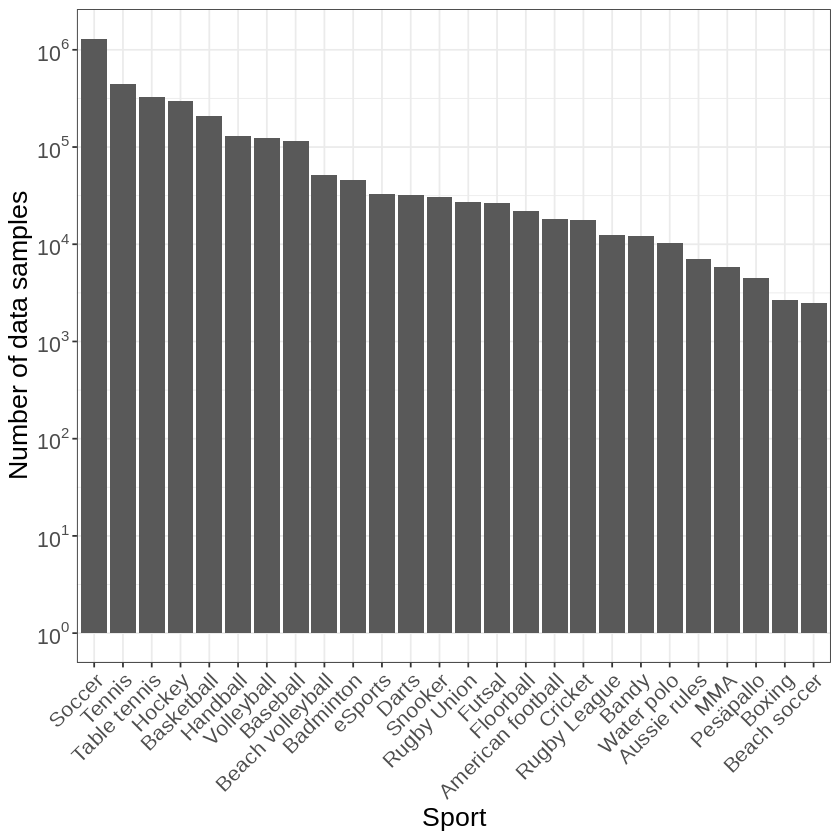

In [5]:
p<-ggplot(data=len_df, aes(x=reorder(X0, -X1), y=X1)) +
  geom_bar(stat="identity") +
  theme_bw() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    xlab('Sport') +
    ylab('Number of data samples')    +
   scale_y_log10(breaks = trans_breaks("log10", function(x) 10^(x)),
              labels = trans_format("log10", math_format(10^.x))) +
    theme(text = element_text(size = 16))
p


In [16]:
ll_df

X,Football,Pesäpallo,Hockey,Futsal,Bandy,Floorball,Handball,Baseball,Rugby.League,⋯,Water.polo,Rugby.Union,Tennis,Aussie.rules,Beach.volleyball,Boxing,American.football,Basketball,Badminton,Volleyball
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-977.0810,-851.9761,-817.3277,-812.0468,-745.0820,-687.2337,-669.1651,-663.6639,-649.1868,⋯,-580.4636,-571.5713,-570.9188,-565.0174,-539.9132,-539.2310,-531.6762,-513.2456,-489.3579,-468.7857
1,-969.3065,-843.3738,-850.1124,-835.3821,-762.4838,-693.3941,-653.1606,-665.0466,-677.1369,⋯,-569.0697,-602.4748,-592.5235,-538.9484,-549.4577,-484.8107,-538.4907,-518.1078,-478.8014,-462.3997
2,-959.9465,-838.6860,-840.3325,-793.6343,-695.4340,-697.6827,-656.2451,-669.2302,-619.2427,⋯,-582.2736,-614.1548,-558.1515,-563.4375,-545.5478,-521.9398,-536.6739,-542.4123,-449.5628,-480.3633
3,-976.2571,-842.0745,-847.7351,-844.8908,-697.5187,-700.1572,-689.3697,-659.6991,-636.9706,⋯,-626.2148,-601.2631,-571.1010,-571.1995,-521.4300,-526.3060,-540.4045,-527.1774,-482.9709,-484.1833
4,-958.5939,-859.4573,-864.5053,-825.5450,-725.1386,-694.7353,-652.5522,-663.0152,-652.8745,⋯,-585.0882,-621.2861,-577.7445,-532.7385,-534.5785,-484.9839,-541.5263,-531.9798,-468.3086,-478.0680
5,-949.2068,-807.0281,-841.6604,-809.3369,-753.2062,-703.7296,-650.6234,-666.8871,-626.6352,⋯,-629.8842,-599.7248,-572.9539,-551.6136,-541.8122,-498.6662,-538.5611,-531.3343,-488.4694,-472.9857
6,-966.3621,-829.9182,-826.3390,-817.7764,-713.8194,-689.8883,-677.1471,-673.7370,-658.7722,⋯,-618.7331,-596.3559,-558.9147,-548.6667,-557.0986,-515.3289,-539.5968,-536.9348,-445.9069,-471.1402
7,-974.1627,-850.5312,-839.4043,-805.9379,-716.1086,-681.2903,-687.3621,-660.2308,-630.6819,⋯,-594.9867,-607.8420,-560.2842,-557.3222,-554.7800,-514.9231,-508.5708,-516.4692,-485.7882,-452.0917
8,-974.0096,-813.2586,-849.4383,-810.1210,-721.5769,-704.1151,-669.9286,-663.8609,-638.1902,⋯,-604.2219,-582.5652,-553.8673,-554.3066,-554.7963,-490.4333,-527.7370,-527.1251,-478.8719,-503.2223


In [17]:
mns <- colMeans(ll_df, na.rm=TRUE)
order(mns)
ll_df <- ll_df[,order(mns)]

[1]  2  4  3  5  6  7  8  9 10 11 12 13 19 14 18 17 15 16 20 21 22 24 25 23 27
[26] 26  1

In [18]:
ll_df

Football,Hockey,Pesäpallo,Futsal,Bandy,Floorball,Handball,Baseball,Rugby.League,Table.tennis,⋯,eSports,Tennis,Aussie.rules,Beach.volleyball,American.football,Basketball,Boxing,Volleyball,Badminton,X
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
-977.0810,-817.3277,-851.9761,-812.0468,-745.0820,-687.2337,-669.1651,-663.6639,-649.1868,-641.5472,⋯,-583.6652,-570.9188,-565.0174,-539.9132,-531.6762,-513.2456,-539.2310,-468.7857,-489.3579,0
-969.3065,-850.1124,-843.3738,-835.3821,-762.4838,-693.3941,-653.1606,-665.0466,-677.1369,-628.0635,⋯,-594.5241,-592.5235,-538.9484,-549.4577,-538.4907,-518.1078,-484.8107,-462.3997,-478.8014,1
-959.9465,-840.3325,-838.6860,-793.6343,-695.4340,-697.6827,-656.2451,-669.2302,-619.2427,-648.5657,⋯,-570.0469,-558.1515,-563.4375,-545.5478,-536.6739,-542.4123,-521.9398,-480.3633,-449.5628,2
-976.2571,-847.7351,-842.0745,-844.8908,-697.5187,-700.1572,-689.3697,-659.6991,-636.9706,-633.3904,⋯,-550.5680,-571.1010,-571.1995,-521.4300,-540.4045,-527.1774,-526.3060,-484.1833,-482.9709,3
-958.5939,-864.5053,-859.4573,-825.5450,-725.1386,-694.7353,-652.5522,-663.0152,-652.8745,-639.6579,⋯,-594.3679,-577.7445,-532.7385,-534.5785,-541.5263,-531.9798,-484.9839,-478.0680,-468.3086,4
-949.2068,-841.6604,-807.0281,-809.3369,-753.2062,-703.7296,-650.6234,-666.8871,-626.6352,-627.4823,⋯,-598.3251,-572.9539,-551.6136,-541.8122,-538.5611,-531.3343,-498.6662,-472.9857,-488.4694,5
-966.3621,-826.3390,-829.9182,-817.7764,-713.8194,-689.8883,-677.1471,-673.7370,-658.7722,-634.4054,⋯,-565.6855,-558.9147,-548.6667,-557.0986,-539.5968,-536.9348,-515.3289,-471.1402,-445.9069,6
-974.1627,-839.4043,-850.5312,-805.9379,-716.1086,-681.2903,-687.3621,-660.2308,-630.6819,-621.4568,⋯,-588.6797,-560.2842,-557.3222,-554.7800,-508.5708,-516.4692,-514.9231,-452.0917,-485.7882,7
-974.0096,-849.4383,-813.2586,-810.1210,-721.5769,-704.1151,-669.9286,-663.8609,-638.1902,-638.0395,⋯,-590.6692,-553.8673,-554.3066,-554.7963,-527.7370,-527.1251,-490.4333,-503.2223,-478.8719,8


In [20]:
ll_melt <- melt(ll_df, id = 'X')
colnames(ll_melt) <- c('X', 'Sport', 'logprobability')
ll_melt$Sport <- str_replace_all(ll_melt$Sport,'\\.',' ')
ll_melt$Sport<-factor(ll_melt$Sport,unique(ll_melt$Sport))
tail(ll_melt)

,X,Sport,logprobability
,<int>,<fct>,<dbl>
2595,94,Badminton,-486.3746
2596,95,Badminton,-446.5006
2597,96,Badminton,-483.0959
2598,97,Badminton,-456.1178
2599,98,Badminton,-485.2995
2600,99,Badminton,-505.4936


Picking joint bandwidth of 5.01



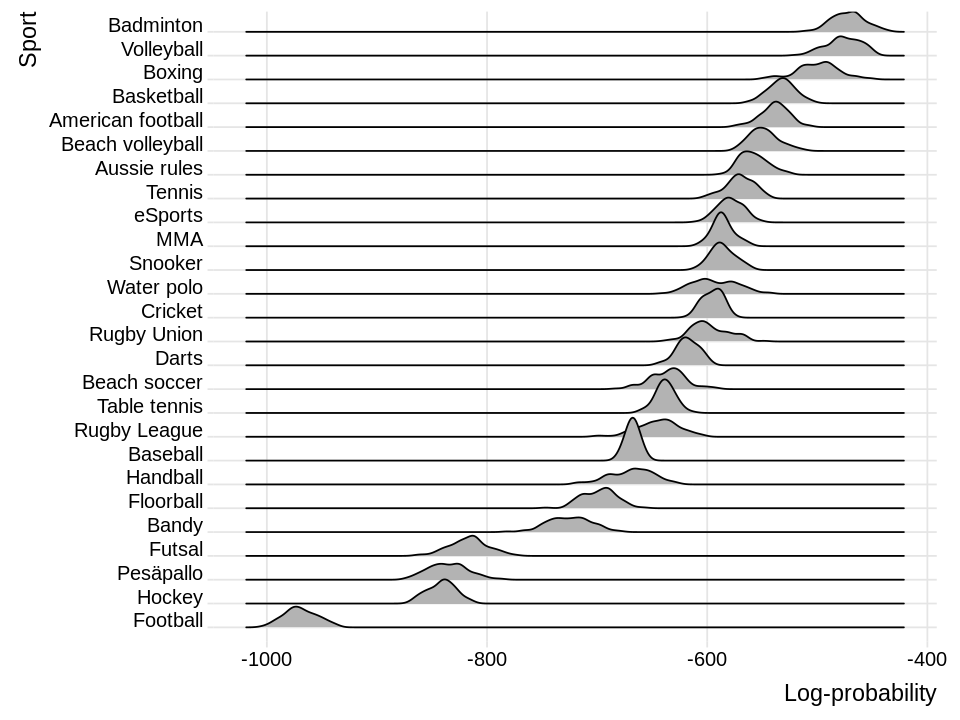

In [23]:
# basic example
options(repr.plot.width = 8, repr.plot.height =6)
ggplot(ll_melt, aes(x = logprobability, y = Sport)) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") +
    labs(x = "Log-probability")

In [30]:
head(norm_f_df)
head(prob_stat_df)

,X,count,mean,std,min,X25.,X50.,X75.,max
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,American football,17981,0.04684045,0.015310335,-1.16146561,0.04232558,0.04638961,0.05057903,0.1984375
2,Aussie rules,7086,0.05924803,0.009564983,0.01426768,0.05343511,0.05809769,0.06522193,0.1516474
3,Badminton,46124,0.06439380,0.011306379,-0.28400000,0.05921053,0.06596257,0.07166124,0.2055394
4,Bandy,12042,0.08687460,0.080922564,-4.69046378,0.08040497,0.08679744,0.09734517,0.1887676
5,Baseball,116509,0.05325688,0.013681947,-1.69652869,0.04354460,0.05319588,0.06192893,0.2078883
6,Basketball,208159,0.06342233,0.015755584,-1.91051604,0.05766578,0.06441441,0.07061404,0.2000000


,X,count,mean,std,min,X25.,X50.,X75.,max,median
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,American football,17981,-538.8379,13.120327,-574.7146,-546.3721,-538.3388,-530.6717,-507.8669,-538.3388
2,Aussie rules,7086,-557.9501,12.749444,-587.1038,-568.0908,-560.0818,-550.2028,-525.7533,-560.0818
3,Badminton,46124,-471.9356,14.904442,-510.6503,-482.7181,-472.2936,-463.1225,-436.3840,-472.2936
4,Bandy,12042,-725.1986,19.677088,-781.5834,-739.1236,-724.4607,-711.6197,-678.8399,-724.4607
5,Baseball,116509,-667.8804,5.518243,-680.3461,-670.6650,-668.1277,-663.8116,-654.6717,-668.1277
6,Basketball,208159,-532.5184,12.291144,-562.0072,-540.9542,-531.9236,-525.1028,-502.2937,-531.9236


In [31]:
plot_df <- data.frame(norm_f_df$X, norm_f_df$X50., prob_stat_df$mean, norm_f_df$X25., norm_f_df$X75.)
colnames(plot_df) = c('sport', 'norm_median', 'prob', 'norm_25', 'norm_75')
plot_df[13,1] = c('Soccer')
plot_df

sport,norm_median,prob,norm_25,norm_75
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
American football,0.04638961,-538.8379,0.04232558,0.05057903
Aussie rules,0.05809769,-557.9501,0.05343511,0.06522193
Badminton,0.06596257,-471.9356,0.05921053,0.07166124
Bandy,0.08679744,-725.1986,0.08040497,0.09734517
Baseball,0.05319588,-667.8804,0.04354460,0.06192893
Basketball,0.06441441,-532.5184,0.05766578,0.07061404
Beach soccer,0.08590704,-635.8827,0.07552432,0.09047480
Beach volleyball,0.07219917,-548.3679,0.06562201,0.07880623
Boxing,0.08353530,-499.5847,0.07365977,0.09240631


In [32]:
#install.packages("ggrepel")
library("ggrepel")

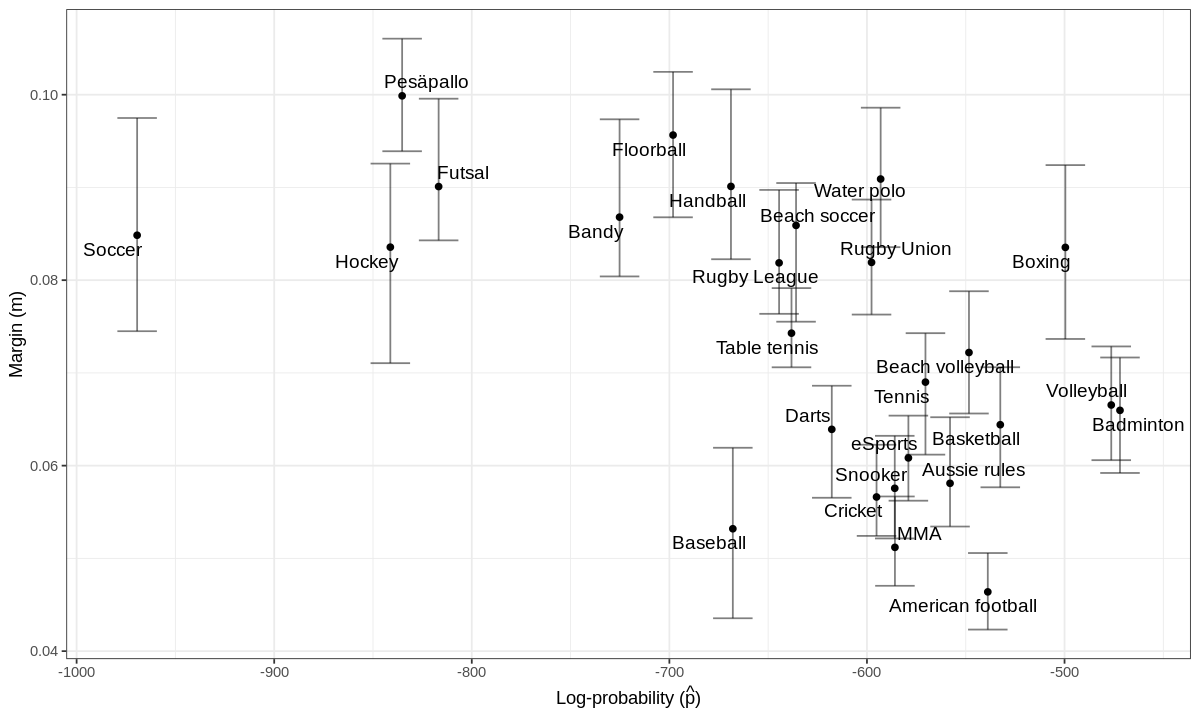

In [33]:
options(repr.plot.width = 10, repr.plot.height =6)

p<- ggplot(data = plot_df, aes(x = prob, y = norm_median, label = sport)) + 
    theme_bw() +
  geom_point() +
 #geom_pointrange(aes(ymin=norm_25, ymax=norm_75))
    geom_errorbar(aes(ymin=norm_25, ymax=norm_75), width=20, alpha = 0.5) +
    labs(x = TeX("Log-probability ($\\hat{p}$)"), y="Margin (m)") +
    geom_text_repel(aes(label = sport), size = 4)
    
print(p)
#geom_text(position=position_jitter(width=0,height=0.005))

In [34]:
margin_diff_df <- read.csv("/storage/ficzere/results/margin_open_close.csv", header = TRUE, sep = ",") 

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”
Warning message:
“Removed 6 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


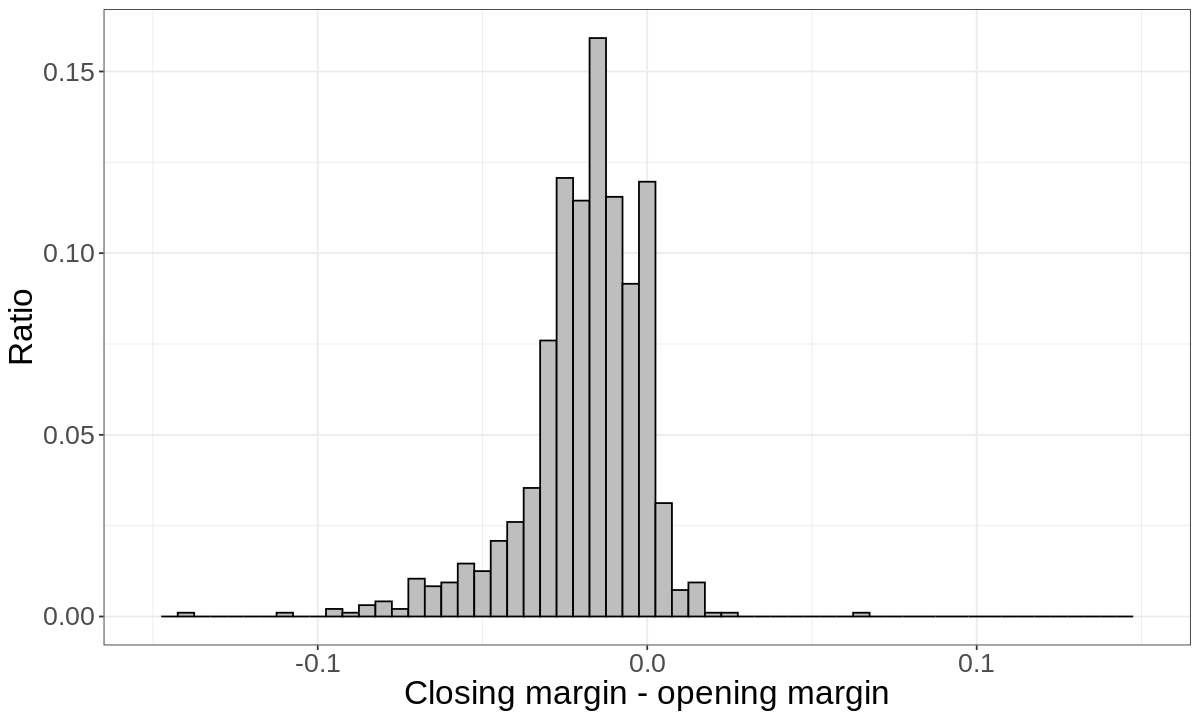

In [35]:
p = ggplot(margin_diff_df, aes(x=X0)) + 
      geom_histogram(binwidth=0.005, aes(y=..count../sum(..count..)), color="black", fill="gray") +
    xlim(-0.15,0.15)+
    theme_bw()  +    
    xlab('Closing margin - opening margin') +
    ylab('Ratio')    +
        theme(text = element_text(size = 20))

p

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”


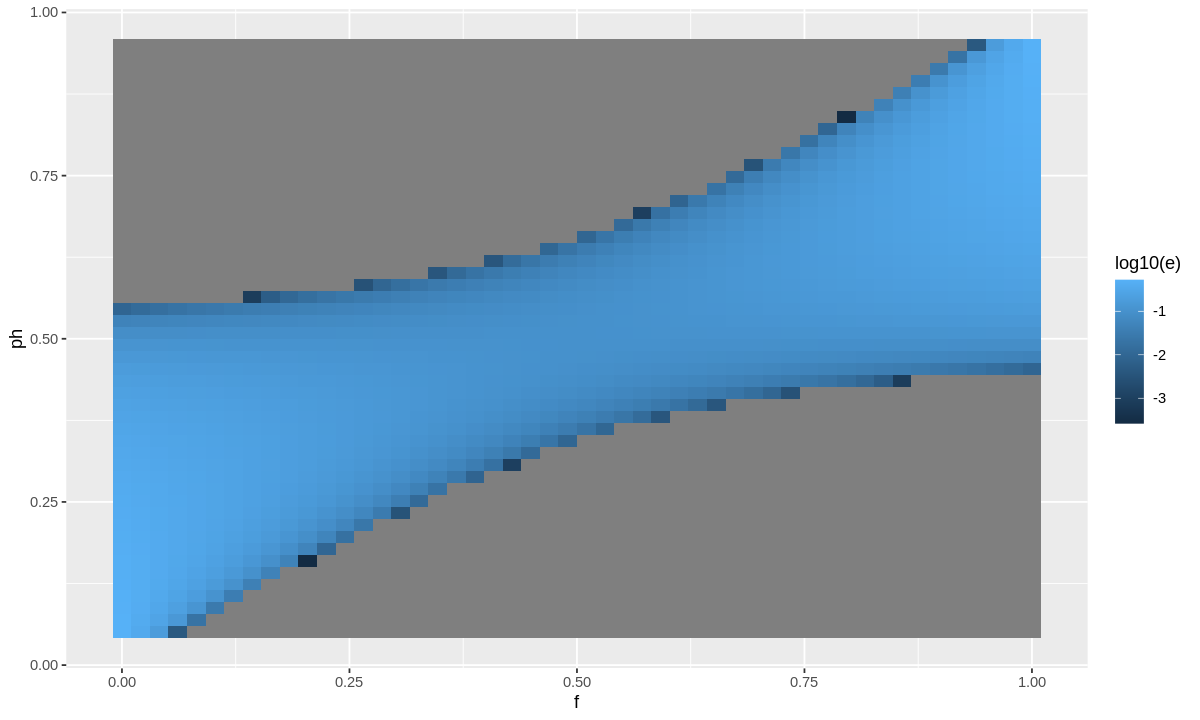

In [38]:
df<-expand.grid(ph=seq(0.05,0.95,length.out=50),f=seq(0,1,length.out=50))
m<-0.1
p<-0.5
df$oa<-1/df$ph*(1-m)
df$ob<-1/(1-df$ph)*(1-m)
df$e<-(df$ob*(1-df$f) - df$oa*df$f)*p + 1 - df$ob*(1-df$f)

 p1 <- ggplot(df, aes(f, ph, fill= log10(e))) + 
  geom_tile()

p1

In [39]:
m<-0.1
p<-0.3
p2 <- ggplot(df, aes(f, ph, fill= log10(e))) + 
  geom_tile()

m<-0.1
p<-0.1
p3 <- ggplot(df, aes(f, ph, fill= log10(e))) + 
  geom_tile()

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”


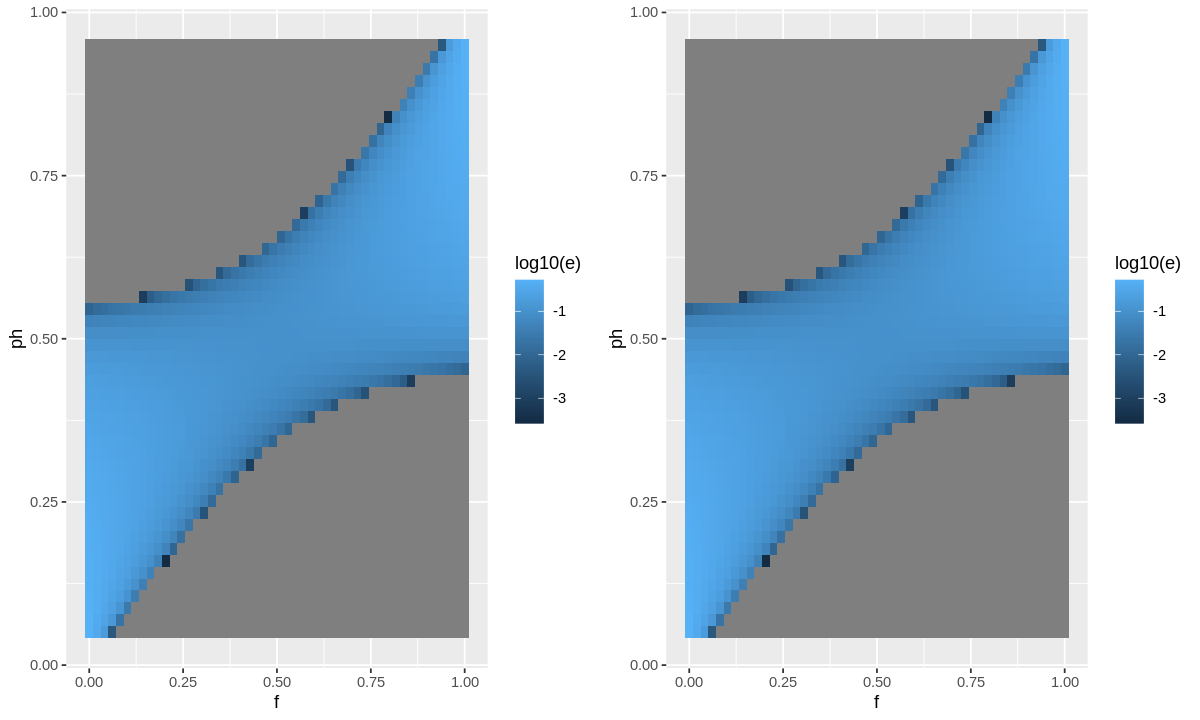

In [40]:
grid.arrange(p1, p2, nrow = 1)

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”


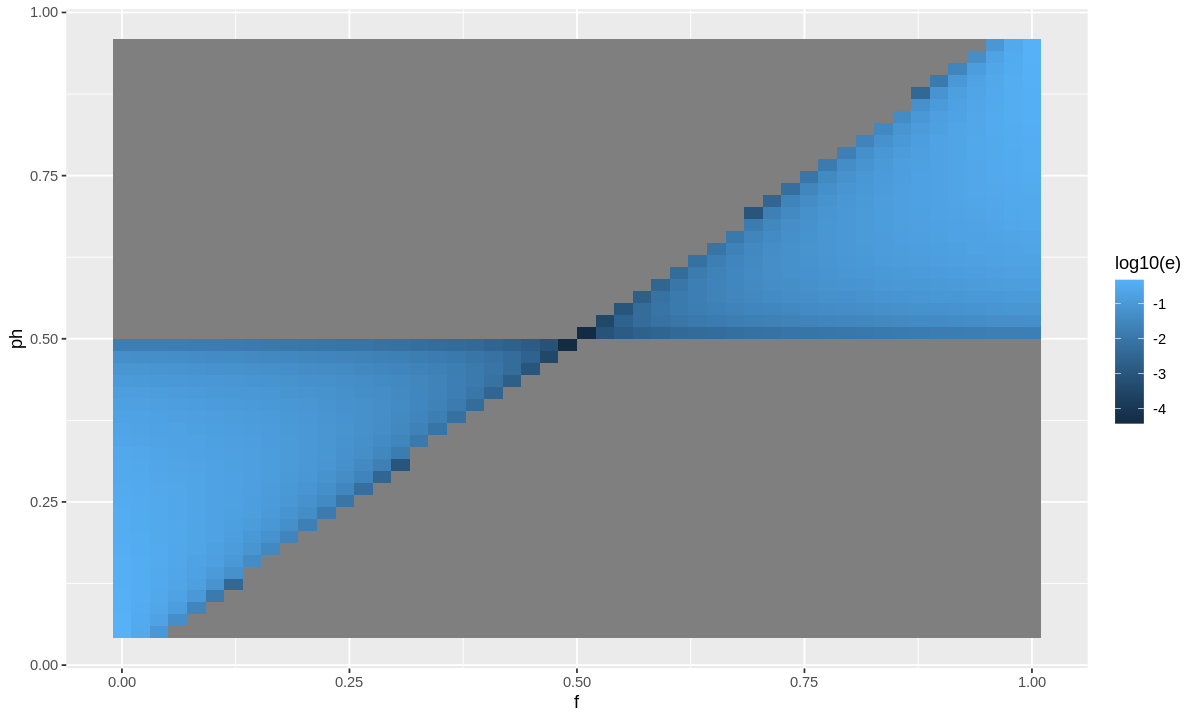

In [41]:
df<-expand.grid(ph=seq(0.05,0.95,length.out=50),f=seq(0,1,length.out=50))
m<-0.0
p<-0.5
df$oa<-1/df$ph*(1-m)
df$ob<-1/(1-df$ph)*(1-m)
df$e<-(df$ob*(1-df$f) - df$oa*df$f)*p + 1 - df$ob*(1-df$f)

ggplot(df, aes(f, ph, fill= log10(e))) + 
  geom_tile()

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”


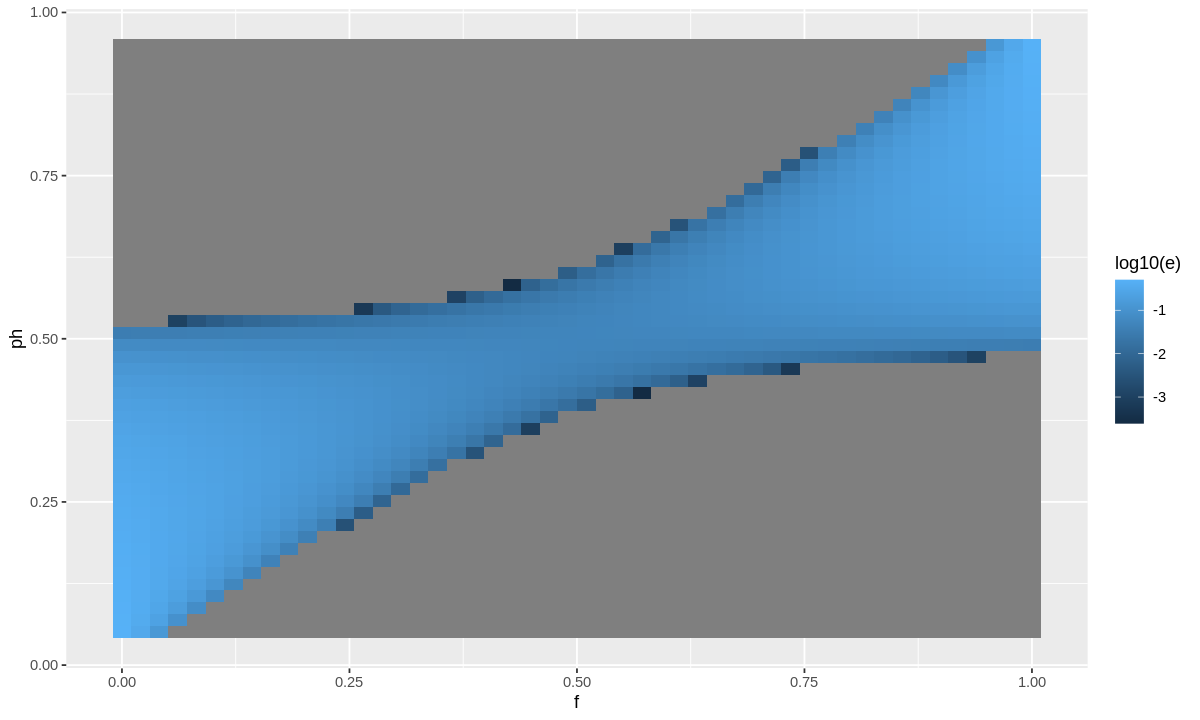

In [42]:
df<-expand.grid(ph=seq(0.05,0.95,length.out=50),f=seq(0,1,length.out=50))
m<-0.05
p<-0.5
df$oa<-1/df$ph*(1-m)
df$ob<-1/(1-df$ph)*(1-m)
df$e<-(df$ob*(1-df$f) - df$oa*df$f)*p + 1 - df$ob*(1-df$f)

ggplot(df, aes(f, ph, fill= log10(e))) + 
  geom_tile()

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”


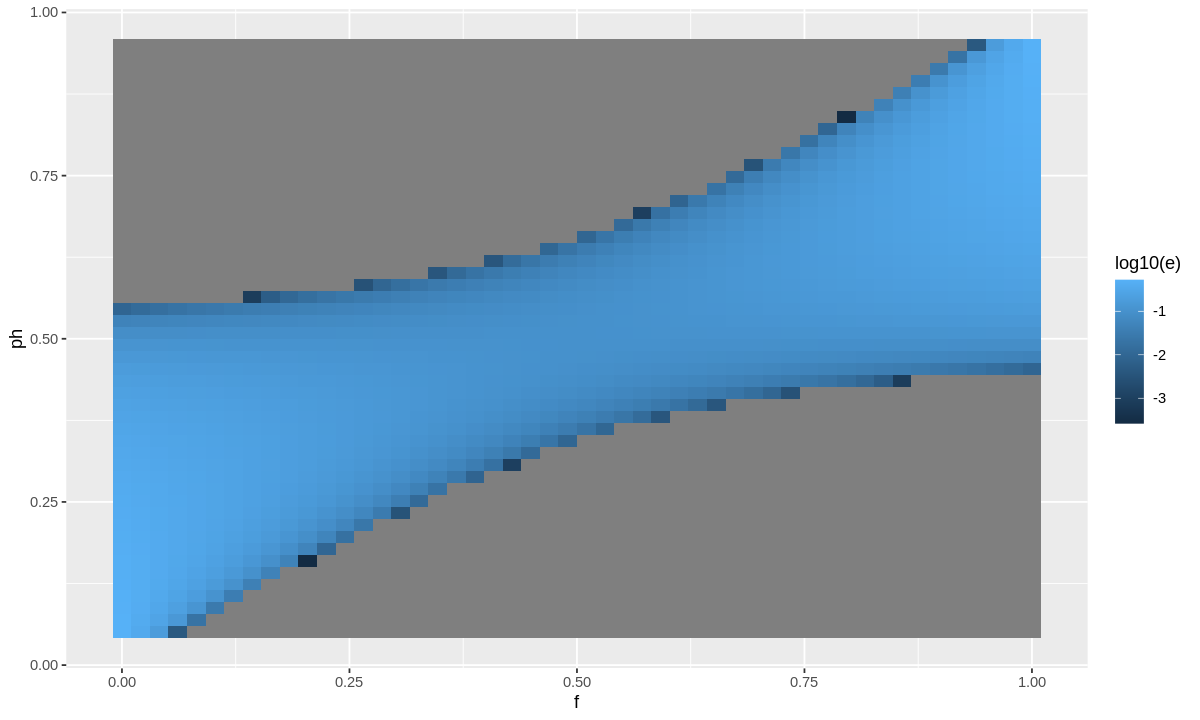

In [43]:
df<-expand.grid(ph=seq(0.05,0.95,length.out=50),f=seq(0,1,length.out=50))
m<-0.1
p<-0.5
df$oa<-1/df$ph*(1-m)
df$ob<-1/(1-df$ph)*(1-m)
df$e<-(df$ob*(1-df$f) - df$oa*df$f)*p + 1 - df$ob*(1-df$f)

ggplot(df, aes(f, ph, fill= log10(e))) + 
  geom_tile()

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”


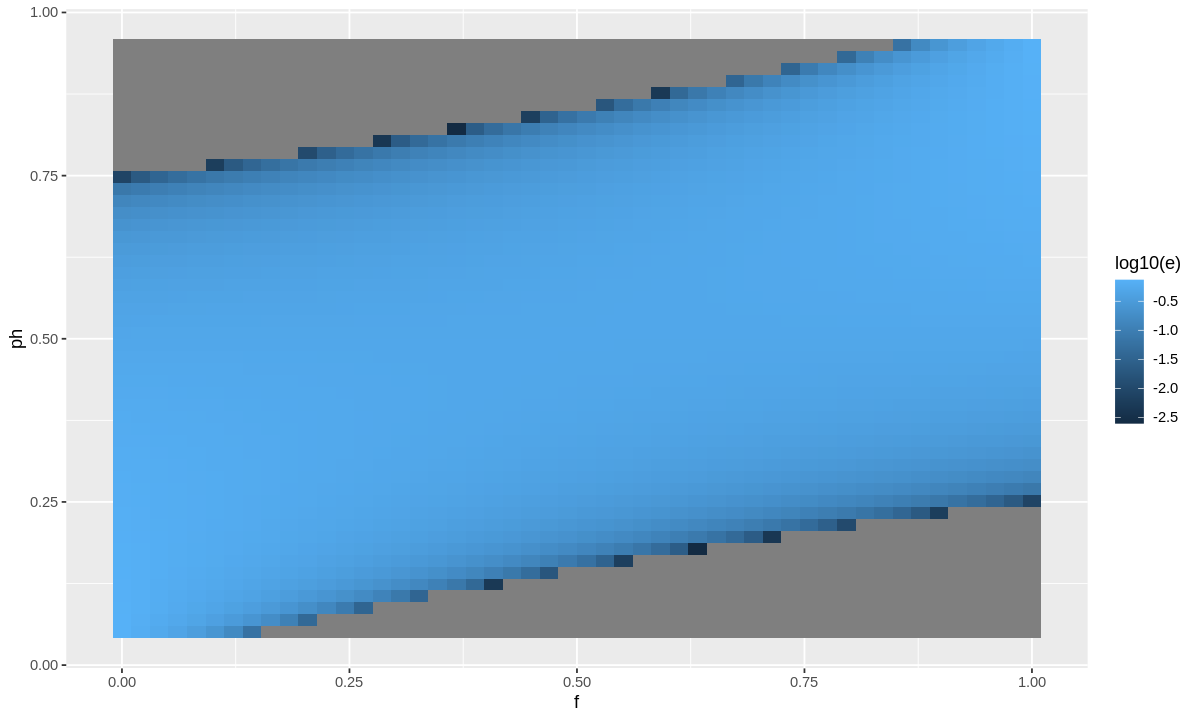

In [44]:
df<-expand.grid(ph=seq(0.05,0.95,length.out=50),f=seq(0,1,length.out=50))
m<-0.5
p<-0.5
df$oa<-1/df$ph*(1-m)
df$ob<-1/(1-df$ph)*(1-m)
df$e<-(df$ob*(1-df$f) - df$oa*df$f)*p + 1 - df$ob*(1-df$f)

ggplot(df, aes(f, ph, fill= log10(e))) + 
  geom_tile()